In [ ]:
!pip install -U hopsworks --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.2/170.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadat

In [ ]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import hopsworks
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/188566
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")

In [ ]:
wine_df.columns = [col.lower().replace(' ', '_') for col in wine_df.columns]
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_df.duplicated().sum() #get rid of duplicated data

1168

In [ ]:
wine_df.drop_duplicates(inplace=True)
wine_df.duplicated().sum()

0

In [ ]:
wine_df.dropna(inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   object 
 1   fixed_acidity         5295 non-null   float64
 2   volatile_acidity      5295 non-null   float64
 3   citric_acid           5295 non-null   float64
 4   residual_sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free_sulfur_dioxide   5295 non-null   float64
 7   total_sulfur_dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   ph                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 579.1+ KB


In [ ]:
wine_df['type'] = pd.factorize(wine_df['type'])[0] + 1 #white : 0 red : 1
wine_df.head()
wine_df['type'] = wine_df['type'].astype(float)

print(wine_df['quality'].unique())
wine_df['quality'].value_counts()

[0. 1.]


0.0    4290
1.0    1005
Name: quality, dtype: int64

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 9) #bins = (2,6,9) has better prediction rate but worse confusion matrix
group_names = ['bad', 'good']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  5295 non-null   float64 
 1   fixed_acidity         5295 non-null   float64 
 2   volatile_acidity      5295 non-null   float64 
 3   citric_acid           5295 non-null   float64 
 4   residual_sugar        5295 non-null   float64 
 5   chlorides             5295 non-null   float64 
 6   free_sulfur_dioxide   5295 non-null   float64 
 7   total_sulfur_dioxide  5295 non-null   float64 
 8   density               5295 non-null   float64 
 9   ph                    5295 non-null   float64 
 10  sulphates             5295 non-null   float64 
 11  alcohol               5295 non-null   float64 
 12  quality               5295 non-null   category
dtypes: category(1), float64(12)
memory usage: 543.1 KB


In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])


In [ ]:
wine_df['quality'] = wine_df['quality'].astype(float)
wine_df['quality'].value_counts()


0.0    4290
1.0    1005
Name: quality, dtype: int64

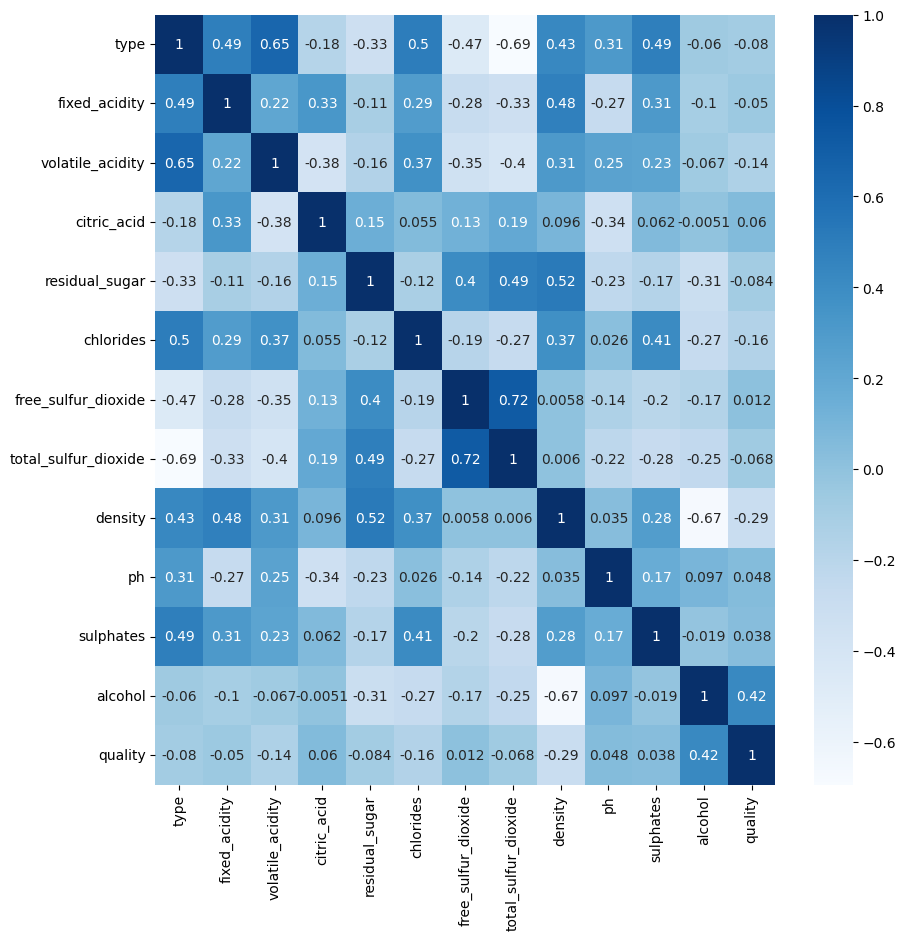

In [ ]:
plt.figure(figsize=(10,10))
corr = wine_df.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');

In [ ]:
#fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'type', data = wine_df)

In [ ]:
wine_fg = fs.get_or_create_feature_group(
    name="wine_bin_classify_269",
    version=1,
    primary_key=["type","fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol"],
    description="Wine dataset")
wine_fg.insert(wine_df)

Uploading Dataframe: 0.00% |          | Rows 0/5295 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_bin_classify_269_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/188566/jobs/named/wine_bin_classify_269_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7e1a0a9a69b0>, None)